In [149]:
import pandas as pd
import numpy as np

In [150]:
pat =  '../../../Desktop/Data Science Final Project/Monthly arrivals/top_ports-2007.xls'
directory = '../../../Desktop/Data Science Final Project/Monthly arrivals/'
exs = pd.read_excel(io=pat, sheetname=[0,1,2,3,4,5,6,7,8,9,10,11])

In [151]:
import re
match = re.search('\d{4}', "adsdas2017")
match.group(0) 


'2017'

In [152]:
import os
import re

for filename in os.listdir(directory):
    if filename.endswith(".xls"): 
        filename = (os.path.join(directory, filename))
        print filename
        match = re.search('\d{4}', filename)
        print match.group(0) 

        continue
    else:
        continue

../../../Desktop/Data Science Final Project/Monthly arrivals/International Visitors to NYC.xls


AttributeError: 'NoneType' object has no attribute 'group'

In [153]:
import os
import re

xl = pd.ExcelFile(pat)
sheets = xl.sheet_names
columns=["City" , "International Visitors" , "val2" , "val3", "Month","Year"]
res = pd.DataFrame(columns=columns)
for filename in os.listdir(directory):
    if filename.endswith(".xls"): 
        filename = (os.path.join(directory, filename))
#         exs = pd.read_excel(filename)
        xl = pd.ExcelFile(filename)
        sheets = xl.sheet_names
        print filename
#         sheets = filename.sheet_names
        match = re.search('\d{4}', filename)
        year = match.group(0) 
        print match.group(0) 
        for sheet in sheets:
            df = xl.parse(sheet,skiprows=4)
            print sheet + str(df.shape)
            print df.columns
            temp = df[df.iloc[:,0].apply(lambda x : ("NEW" in str(x)))]
            temp["Date"] = sheet
            temp["Year"] = year
            temp.columns=columns
            res = res.append(temp,ignore_index=True)

../../../Desktop/Data Science Final Project/Monthly arrivals/International Visitors to NYC.xls


AttributeError: 'NoneType' object has no attribute 'group'

In [154]:
res=res.drop(["val2" , "val3"],axis=1)

In [155]:
#data['result'] = data['result'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))
res['Month'] = res['Month'].map(lambda x: x.rstrip('07'))

In [156]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [157]:
print_full(res)

Empty DataFrame
Columns: [City, International Visitors, Month, Year]
Index: []


In [158]:
res.drop([124,125,128,129,132,133,136,137,140,141,144,145,148,149,152,153,156,157,160,161,164,165],inplace=True)


ValueError: labels [124 125 128 129 132 133 136 137 140 141 144 145 148 149 152 153 156 157
 160 161 164 165] not contained in axis

In [159]:
print_full(res)

Empty DataFrame
Columns: [City, International Visitors, Month, Year]
Index: []


In [160]:
res['Month'] = res['Month'].str[:3]

In [161]:
print_full(res)

Empty DataFrame
Columns: [City, International Visitors, Month, Year]
Index: []


In [162]:
from time import strptime

In [163]:
res['Month'] = res['Month'].map(lambda x: strptime(x,'%b').tm_mon)


In [164]:
print_full(res)

Empty DataFrame
Columns: [City, International Visitors, Month, Year]
Index: []


In [165]:
#centers = beer.groupby('cluster').mean()
res_sum = res.groupby(['Year','Month'])['International Visitors'].sum()


In [166]:
res=pd.DataFrame(res_sum)

In [167]:
x = np.array([[2007,2008,2009,2010,2011,2012,2013]])
Year_repeat=np.repeat(x, 12)


In [168]:
res['Year']=Year_repeat

In [170]:
res.to_csv(path_or_buf='../../../Desktop/Data Science Final Project/Monthly arrivals/res',header=None,index=False)

In [171]:
data_frame=pd.read_csv('../../../Desktop/Data Science Final Project/Monthly arrivals/International Visitors to NYC.csv')

In [172]:
data_frame

,International Visitors,Year,Month,Year and Month
0,296193,2007,1,Jan-07
1,311727,2007,2,Feb-07
2,418833,2007,3,Mar-07
3,451262,2007,4,Apr-07
4,437930,2007,5,May-07
5,452837,2007,6,Jun-07
6,522215,2007,7,Jul-07
7,500939,2007,8,Aug-07
8,462096,2007,9,Sep-07
9,531863,2007,10,Oct-07


In [173]:
data_frame.describe()


,International Visitors,Year,Month
count,84.000000,84.000000,84.000000
mean,518369.857143,2010.000000,6.500000
std,104126.064810,2.012012,3.472786
min,296193.000000,2007.000000,1.000000
25%,450194.250000,2008.000000,3.750000
50%,533926.500000,2010.000000,6.500000
75%,587274.250000,2012.000000,9.250000
max,716854.000000,2013.000000,12.000000


In [174]:
import matplotlib.pyplot as plt
%matplotlib inline

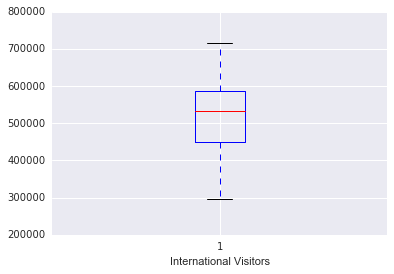

In [175]:
#Box plot for International Visitors
plt.boxplot(data_frame['International Visitors'])
plt.xlabel('International Visitors')
plt.show()

The plot shows that the number of international visitors is slightly skewed to the left of the median.

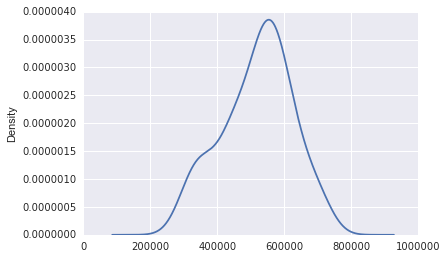

In [176]:
data_frame['International Visitors'].plot(kind='density')


This probability distribution also shows a slightly left leaning skew. The data looks like it is normally distributed howver, so it doesn not seem like any data transformation is needed.

In [177]:
import seaborn as sb
%matplotlib inline

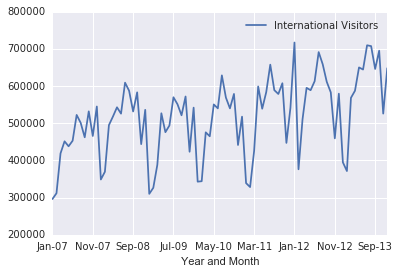

In [181]:
data_frame[['International Visitors']].plot(x=data_frame['Year and Month'])

The graph above shows the number of international visitors arriving through New York City airports for every month from 2007 to 2013. This time series shows both a postive trend and seasonal patterns in the numbers of visitors. The numbers seem to gradually go up from January and reach their apex around July and then go down until they reach the lowest point in around November.